In [1]:
import pandas as pd
#import os
#import matplotlib.dates as mdates
import matplotlib.pyplot as plt
#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.labelweight'] = 'bold'
import seaborn as sns
sns.set(font_scale=1.2)
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

var_list = ['Co', 'Gom', 'Env', 'Epg', 'Bbl', 'Rpc', 'Ep']
df = pd.read_csv('/shared/share_mamaysky-glasserman/energy_drivers/2023/DataProcessing/concat/date_fixed_article_level_measures.csv')
pastDays = 1

In [26]:
dataset = pd.read_stata('transformed_data_prices_v19.2_mod.dta')
for var in var_list:
    twoMostNegativeChangesIndex = dataset[f's{var}_Fri'].diff().nsmallest(5).index
    twoMostNegativeChangesDate = dataset['date_Wed'][twoMostNegativeChangesIndex]
    print([int(date.strftime('%Y%m%d')) for date in twoMostNegativeChangesDate.to_list()])

[20020410, 20000913, 20000920, 20021225, 20010912]
[20100616, 19990714, 20060809, 20100609, 20040128]
[20100505, 20100616, 20050831, 20021002, 20100609]
[20150325, 20150902, 20150624, 20151209, 20140813]
[20021009, 20010314, 20021204, 20190515, 20040211]
[20190821, 20190814, 20190828, 20190904, 20180404]
[20110316, 20020123, 20020130, 20020206, 20110323]


In [3]:
# Arrange the plotting order of topics
topic_name_dict={'1':'Co','2':'Gom','3':'Env','4':'Epg',
                 '5':'Bbl','6':'Rpc','7':'Ep'}
# Get title of each topic
topic_title_dict={'Co':'Company (Co)', 'Gom':'Global Oil Market (Gom)', 'Env':'Environment (Env)',
                  'Bbl':'Crude Oil Physical (Bbl)','Rpc':'Refining & Pertrochemicals (Rpc)',
                  'Ep':'Exploration & Production (Ep)','Epg':'Energy/Power Generation (Epg)'}

In [4]:
# %% Defining Functions
def plot_freq(dataset):
    # ytick dict by topic
    topic_ytick_dict={'Co':[0,0.1,0.2,0.3,0.4], 'Gom':[0,0.1,0.2,0.3,0.4,0.5,0.6], 'Env':[0,0.05,0.1,0.15],
                      'Bbl':[0,0.05,0.1],'Rpc':[0,0.01,0.02,0.03,0.04],
                      'Ep':[0,0.05,0.1,0.15],'Epg':[0.2,0.3,0.4,0.5]}
    # i,j to adjust plotting position
    i=0;j=0
    fig,axe=plt.subplots(4,2,figsize=(16,20),dpi=200)
    for k in range(7):
        i=int(k/2)
        j=k%2
        # get topic name
        topic = topic_name_dict[str(k+1)]
        # get topic title
        topic_title=topic_title_dict[topic]
        axe[i,j].plot(dataset['date'], dataset['ftopic'+str(k+1)+'_4wk'],color='b')
        # turn off the axis
        # set title and take care of fontsize, color as well as padding
        axe[i,j].set_title(topic_title,fontsize=20,color='black',pad=25,fontweight='bold')
        axe[i,j].set_xlim(dataset['date'].values[0],dataset['date'].values[-1])
        axe[i,j].set_yticks(topic_ytick_dict[topic])
        axe[i,j].set_yticklabels(topic_ytick_dict[topic], fontsize=15)
        xtick,_=plt.xticks()
        axe[i,j].set_xticklabels((1996, 2000,2004,2008,2012,2016,2020),fontsize=15)
        if event_dates[str(k+1)] != None:
            event_date = event_dates[str(k+1)][0]
            axe[i,j].plot(datetime.strptime(event_date,'%Y-%m-%d'),
                    dataset.loc[dataset.date_Wed == event_date,'ftopic'+str(k+1)+'_4wk'],
                    marker='*',color='red',markersize=16)
    # do not forget disguise the last plot
    axe[3,1].axis('off')
    fig.suptitle('Panel A: Topical Frequency', fontsize=30)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    # adjust the position between subplots
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    plt.savefig('Fig2_1.pdf')
    
def plot_sent(dataset):
    # ytick dict by topic
    topic_ytick_dict={'Co':[0,-1,-2,-3], 'Gom':[0,-5,-10,-15], 'Env':[0,-1,-2,-3],
                      'Bbl':[0,-0.5,-1,-1.5],'Rpc':[0,-0.5,-1],
                      'Ep':[0,-.5,-1,-1.5,-2,-2.5],'Epg':[0,-5,-10,-15]}
    # y position of the scale annotation (\times 10^{-3})
    annotation_y_dict={'Co':0.1, 'Gom':0.24, 'Env':0.18,
                      'Bbl':0.05,'Rpc':0.06,
                      'Ep':0.1,'Epg':0.26}
    # i,j to adjust plotting position
    i=0;j=0
    fig,axe=plt.subplots(4,2,figsize=(16,20),dpi=200)
    for k in range(7):
        i=int(k/2)
        j=k%2
        # get topic name
        topic = topic_name_dict[str(k+1)]
        # get topic title
        topic_title=topic_title_dict[topic]
        
        axe[i,j].plot(dataset['date'], 1000*dataset['stopic'+str(k+1)+'_4wk'],color='b')
        # turn off the axis
        # set title and take care of fontsize, color as well as padding
        axe[i,j].set_title(topic_title,fontsize=20,color='black',pad=25,fontweight='bold')
        axe[i,j].set_xlim(dataset['date'].values[0],dataset['date'].values[-1])
        axe[i,j].set_yticks(topic_ytick_dict[topic])
        axe[i,j].set_yticklabels(topic_ytick_dict[topic], fontsize=15)
        xtick,_=plt.xticks()
        axe[i,j].text(pd.Timestamp('1998-05-01'),annotation_y_dict[topic],r'$\times 10^{-3}$',fontsize=12)
        axe[i,j].set_xticklabels((1996,2000,2004,2008,2012,2016,2020),fontsize=15)
        if event_dates[str(k+1)] != None:
            event_date = event_dates[str(k+1)][0]
            axe[i,j].plot(datetime.strptime(event_date,'%Y-%m-%d'),
                    1000*dataset.loc[dataset.date_Wed == event_date,'stopic'+str(k+1)+'_4wk'],
                    marker='*',color='red',markersize=16)
    # do not forget disguise the last plot
    axe[3,1].axis('off')
    fig.suptitle('Panel B: Topical Sentiment', fontsize=30)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    # adjust the position between subplots
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    plt.savefig('Fig2_2.pdf')

def plot_others(dataset):
    # Arrange the plotting order of topics
    topic_name_dict={'1':'artcount_4wk','2':'entropy_4wk','3':'PCAsent','4':'PCAfreq',
                     '5':'PCAall'}
    # Get title of each topic
    topic_title_dict={'artcount_4wk':'Article Counts', 'entropy_4wk':'Entropy', 'PCAsent':'First PC of Normalized Topical Sentimant',
                      'PCAfreq':'First PC of Normalized Topical Frequency','PCAall':'First PC of Normalized all Text Variables'}
    # ytick dict by topic
    topic_ytick_dict={'artcount_4wk':[0,150,300,450,600,750], 'entropy_4wk':[1.8,2.0,2.2,2.4], 'PCAsent':[-4,-2,0,2,4],
                      'PCAfreq':[-4,-2,0,2,4],'PCAall':[-6,-3,0,3,6]}
    # i,j to adjust plotting position
    i=0;j=0
    fig,axe=plt.subplots(3,2,figsize=(16,15),dpi=200)
    for k in range(5):
        i=int(k/2)
        j=k%2
        # get topic name
        topic = topic_name_dict[str(k+1)]
        # get topic title
        topic_title=topic_title_dict[topic]
        
        axe[i,j].plot(dataset['date'], dataset[topic_name_dict[str(k+1)]],color='b')
        # turn off the axis
        # set title and take care of fontsize, color as well as padding
        axe[i,j].set_title(topic_title,fontsize=20,color='black',pad=25,fontweight='bold')
        axe[i,j].set_xlim(dataset['date'].values[0],dataset['date'].values[-1])
        axe[i,j].set_yticks(topic_ytick_dict[topic])
        axe[i,j].set_yticklabels(topic_ytick_dict[topic], fontsize=15)
        xtick,_=plt.xticks()
        axe[i,j].set_xticklabels((1996,2000,2004,2008,2012,2016,2020),fontsize=15)
    # do not forget disguise the last plot
    axe[2,1].axis('off')
    fig.suptitle('Panel C: Article Counts, Unusualness and PCA series', fontsize=30)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    # adjust the position between subplots
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    plt.savefig('Fig2_3.pdf')

def get_dataset(file_dir):
    # read the latest dataset
    dataset = pd.read_stata(file_dir)
    date_cols_price = [x for x in list(dataset.columns.values) if 'date' in x]
    dataset = dataset.rename(columns={x:'_'.join(x.split('_')[:-1]) for x in set(dataset.columns.values) if x not in date_cols_price})

    # remedy missing var in in-sample analysis
    dataset = dataset.rename(columns={'date_Fri':'date'})
    # remedy missing var in in-sample analysis
    dataset['sent'] = dataset['sCo']+dataset['sGom']+dataset['sEnv']\
                     +dataset['sEpg']+dataset['sBbl']+dataset['sRpc']+dataset['sEp']
    return dataset

# original series

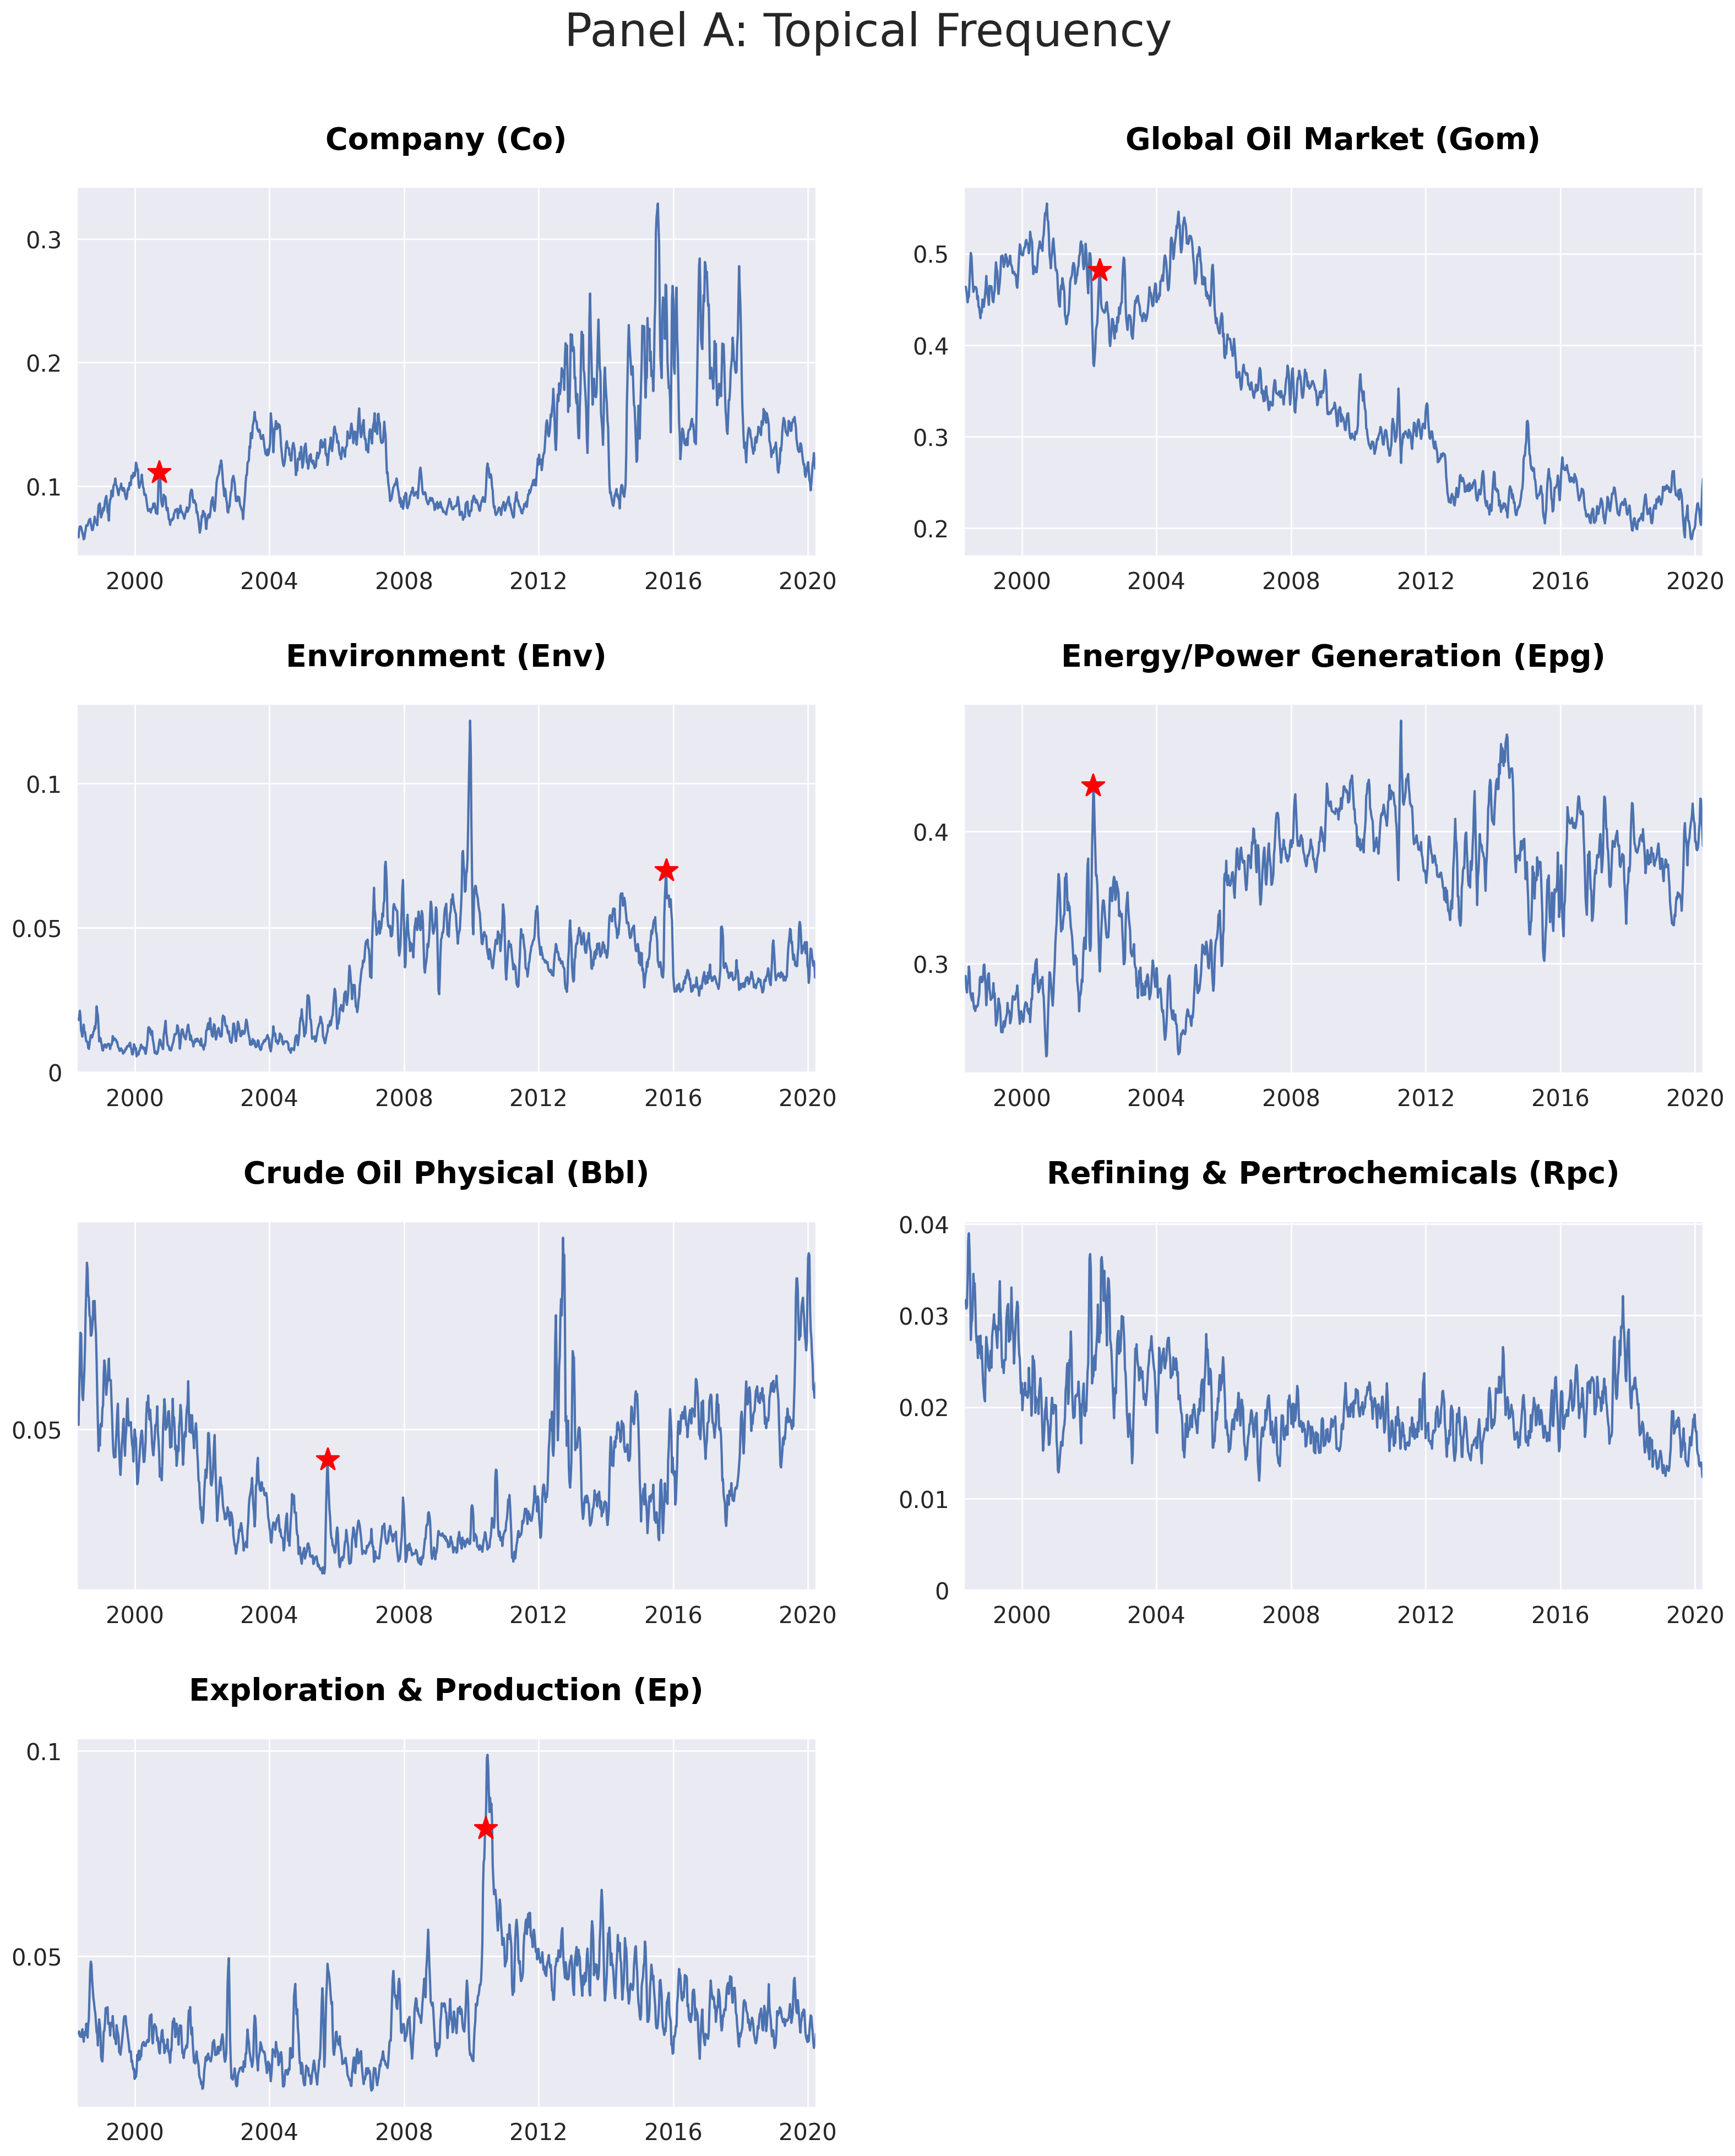

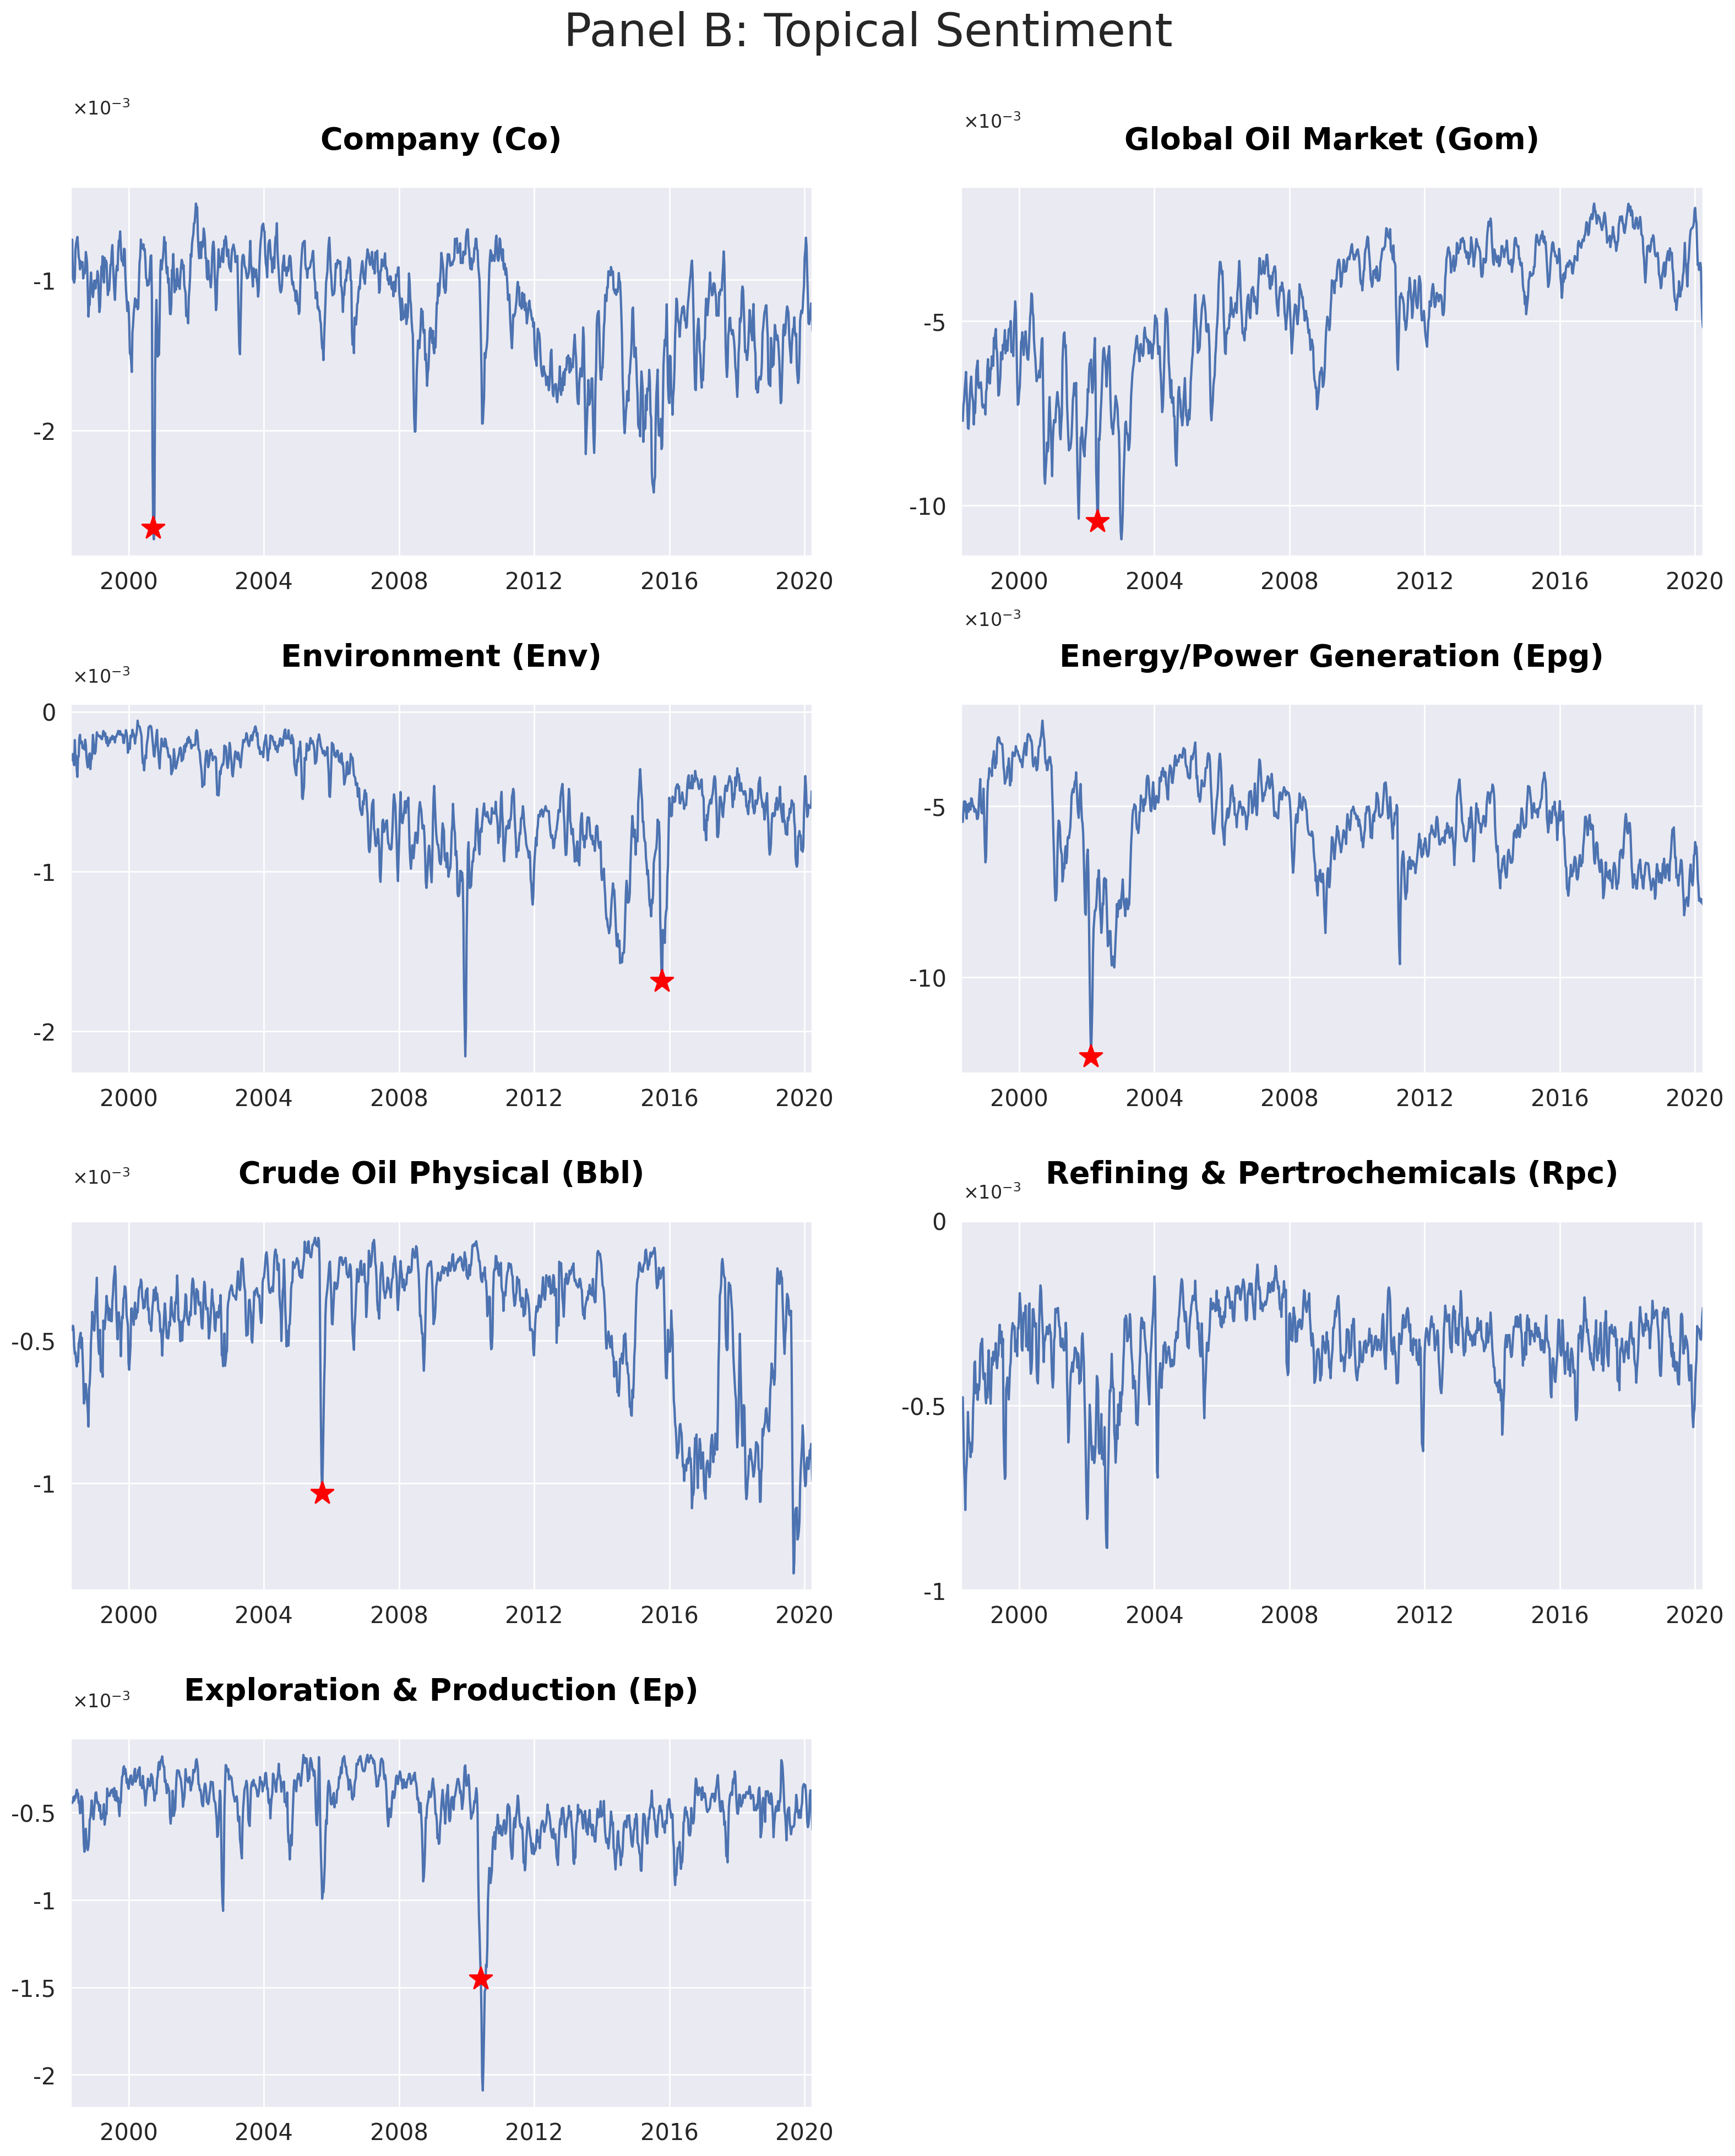

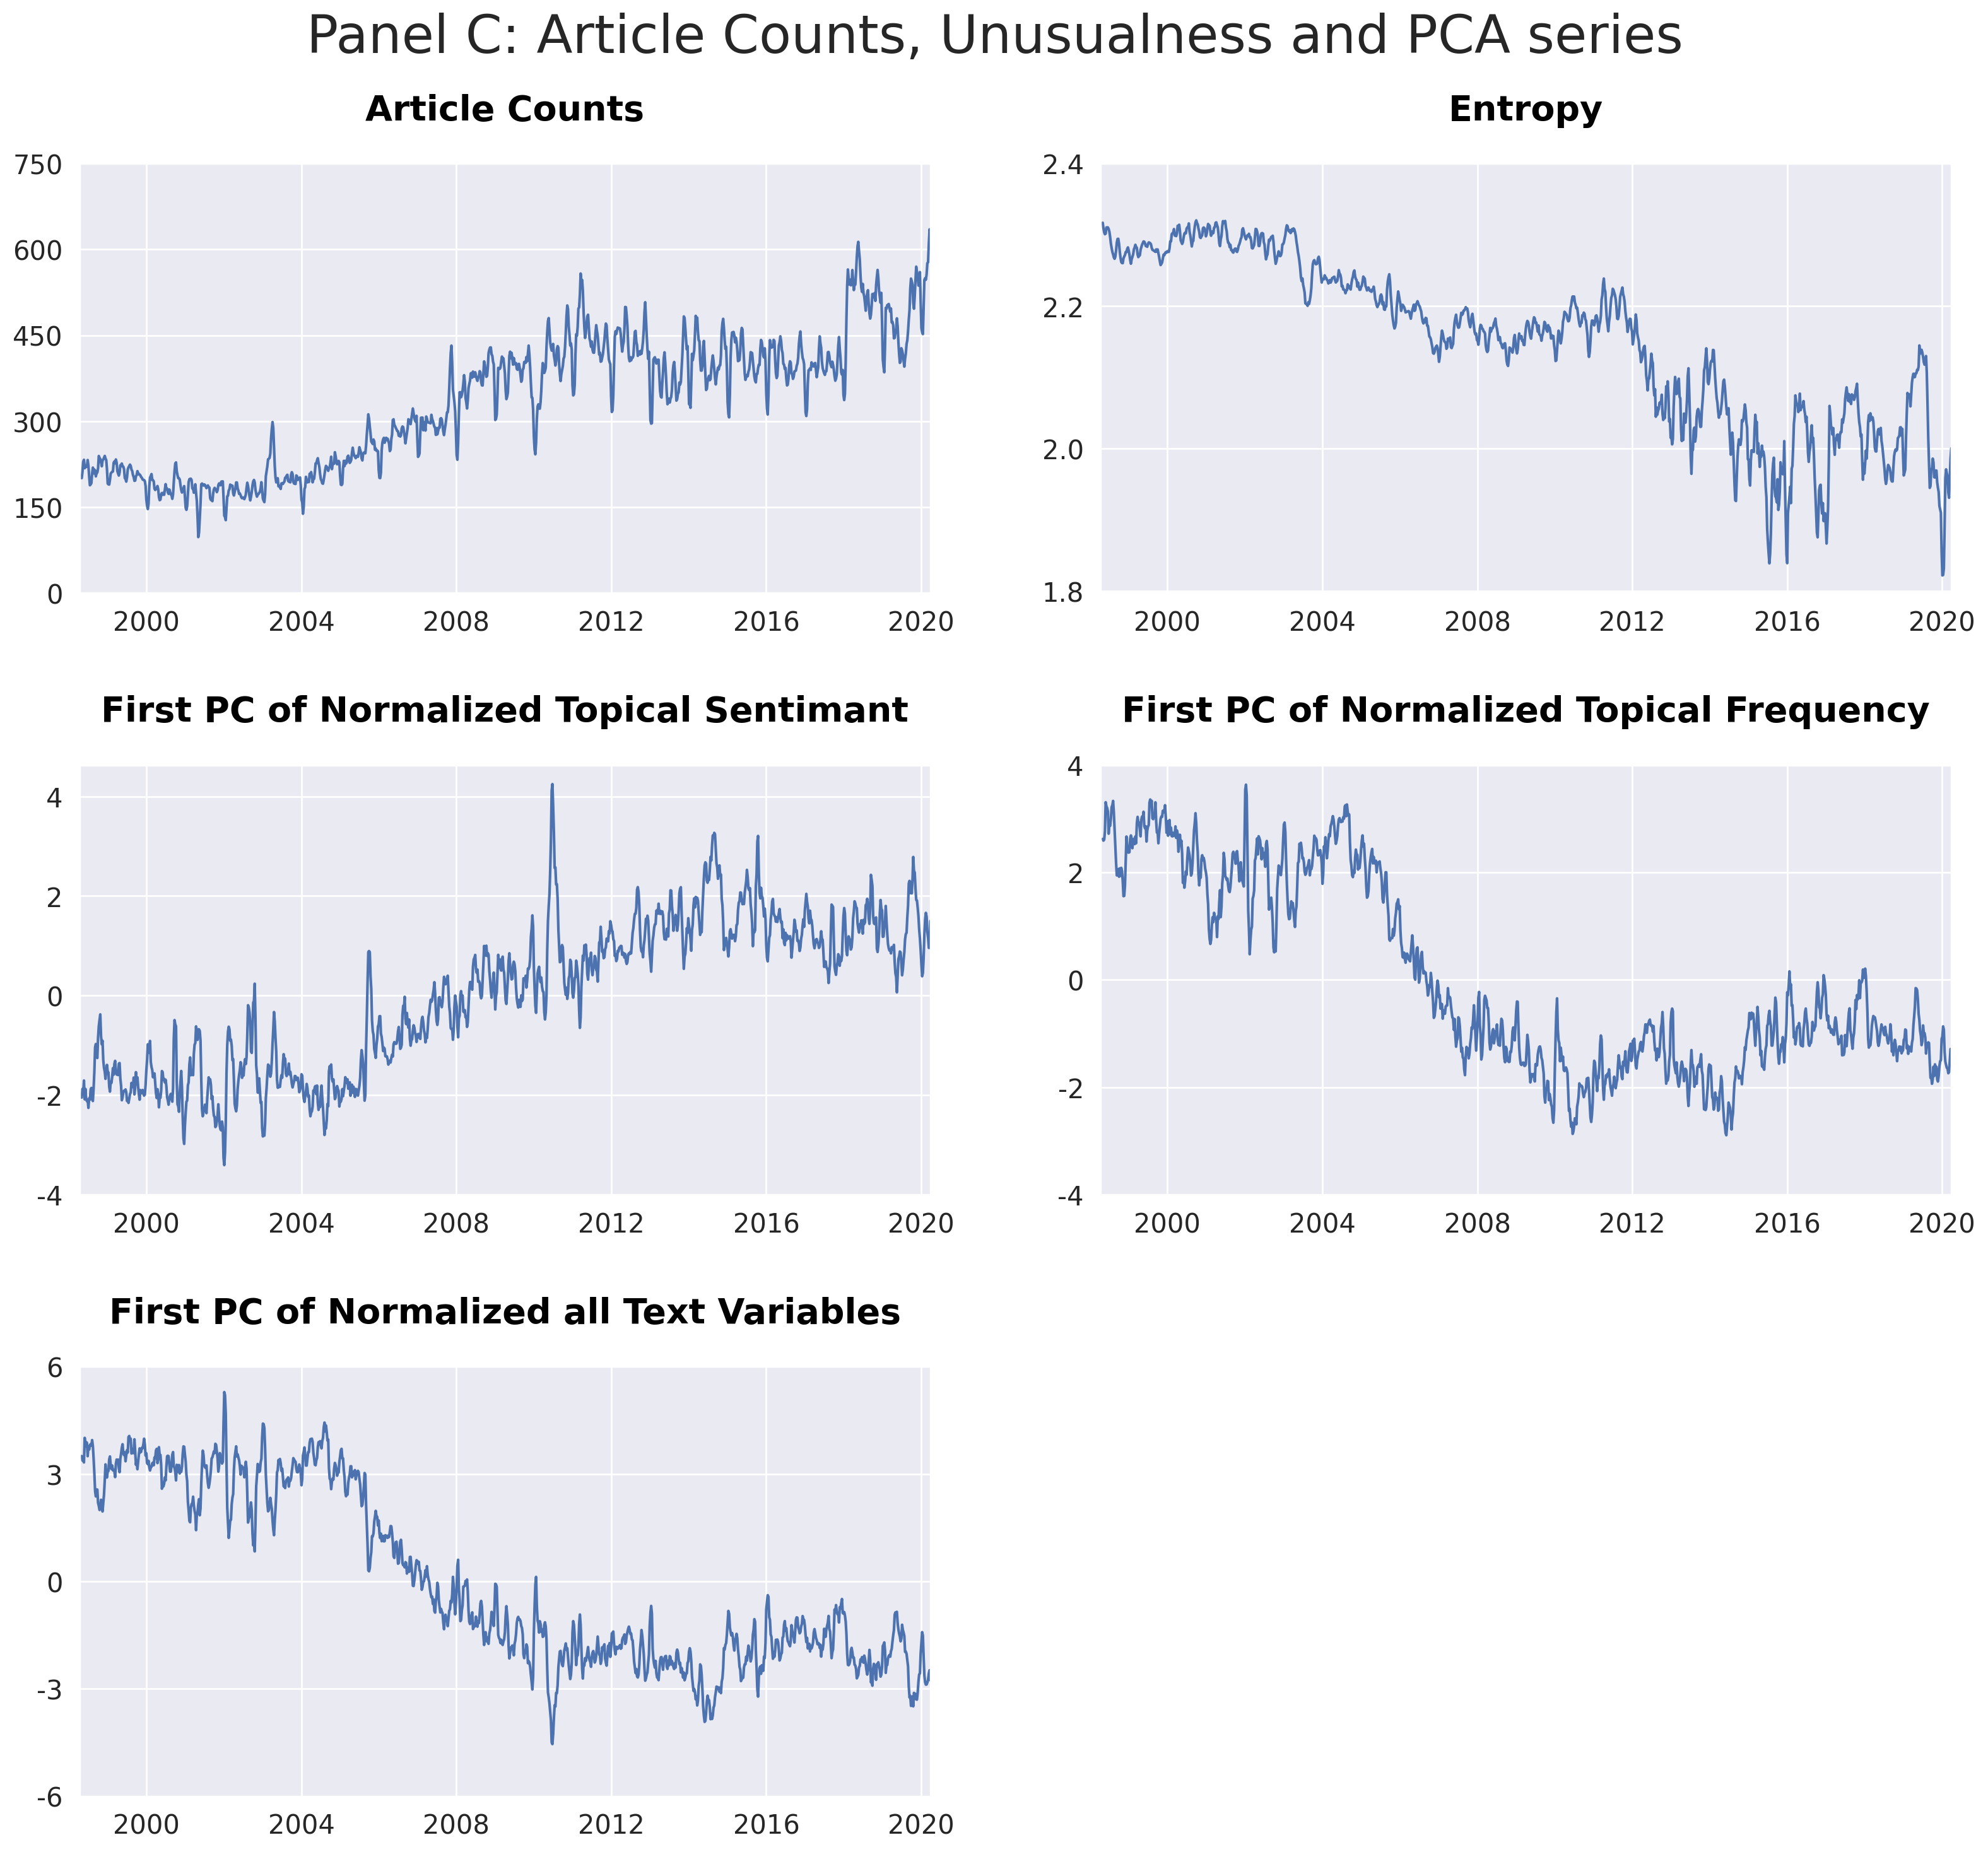

In [7]:
event_dates = {'1':('2000-09-20','UK fuel protests'),
               '2':('2002-04-24','Failed Venezuelan coup'),
               '3':('2015-10-14','Volkswagen emissions scandal'),
               '4':('2002-02-13','Post-bankruptcy Enron hearings'),
               '5':('2005-09-21','Hurricane Katrina'),
               '6':None,
               '7':('2010-06-02','BP oil spill aftermath')}

# read the latest dataset
dataset = pd.read_stata('transformed_data_prices_v19.dta')
date_cols_price = [x for x in list(dataset.columns.values) if 'date' in x]
dataset = dataset.rename(columns={x:'_'.join(x.split('_')[:-1]) for x in set(dataset.columns.values) if x not in date_cols_price})

# remedy missing var in in-sample analysis
dataset = dataset.rename(columns={'date_Fri':'date'})
# remedy missing var in in-sample analysis
dataset['sent'] = dataset['sCo']+dataset['sGom']+dataset['sEnv']\
                 +dataset['sEpg']+dataset['sBbl']+dataset['sRpc']+dataset['sEp']

plot_freq(dataset)
plot_sent(dataset)
plot_others(dataset)

In [9]:
# mod
dataset = pd.read_stata('transformed_data_prices_v19.2_mod.dta')
df_headlines = {}
for i, var in enumerate(var_list):
    twoMostNegativeChangesIndex = dataset[f's{var}_Fri'].diff().nsmallest(2).index
    twoMostNegativeChangesDate = dataset['date_Wed'][twoMostNegativeChangesIndex]
    datesPastWeek = pd.date_range(end=twoMostNegativeChangesDate.iloc[0], periods=pastDays).to_list()\
                    +pd.date_range(end=twoMostNegativeChangesDate.iloc[1], periods=pastDays).to_list()
    datesPastWeek = [int(date.strftime('%Y%m%d')) for date in datesPastWeek]
    filtered_df = df.query(f"`date` in @datesPastWeek and `entropy` >= 2 and `total` >= 100 and `Topic{i+1}` > 0.25")
    filtered_df['weight'] = filtered_df[f'Topic{i+1}'] * filtered_df['sentiment']
    filtered_df = filtered_df.sort_values('weight', ascending=True)
    filtered_df = filtered_df[['date', 'headline']].set_index('date')
    df_headlines[var] = filtered_df
    
for var in var_list:
    for date in set(df_headlines[var].index):
        print(topic_title_dict[var])
        print(date)
        try:
            display(df_headlines[var].loc[date,'headline'].to_list())
        except AttributeError:
            pass

Company (Co)
20000913


['EU asks Belgium for information on trucks protest',
 'UPDATE 1-UK business says fuel crisis hurting',
 'Fuel crisis costs UK firms 250 mln stg a day -LCC',
 'Fuel crisis threatens UK metal plants',
 'Polish truckers to protest against pricy fuel',
 'Polish truckers to protest against pricy fuel',
 'Trucks choke central London in fuel price protest',
 'Belgian truckers block entrance to Antwerp port',
 'FACTBOX-Much of Europe stalled by petrol protests',
 'FACTBOX-Much of Europe stalled by petrol protests',
 'FACTBOX-Much of Europe stalled by petrol protests',
 'Trucks choke central London in fuel price protest',
 'China Unipec suspends trade with Arcadia, Glencore',
 'Rumours cause French Riviera petrol panic buying',
 'British papers urge Blair to cut fuel prices',
 'UPDATE 1-Beginning of end in British fuel crisis',
 'UK Conservatives call for end to fuel protests',
 'UPDATE 1-Truckers block Belgian borders in fuel price protest',
 'Euro Grain-Fuel protests yet to hit grain transpo

Company (Co)
20020410


['US stocks bounce after sell-off, Cisco boosts techs',
 'U.S. techs edge up, blue chips rally at midday',
 'U.S. stocks hold gains, Cisco bounces after drop',
 'European MTBE drops faster than gasoline',
 'EU stance threatens major Norway gas find-Shell',
 'Shell, Todd Energy to sell NZ$1bn of gas - media',
 'Indonesia Pertamina buys 920,000 bbls May gasoline',
 'Pertamina buys May gas oil, kerosene from affiliate',
 'U.S. spot resids slightly lower in dull market',
 'Olympic, other firms to pay $75 mln in blast settlement',
 'Shell Norway hopes of giant gas find fade-source',
 'Statoil turns to Med, Asia to clear N.Sea overhang',
 'Asia crude cash trades - Apr 10 1014 GMT',
 'Asia crude cash trades - Apr 10 0100 GMT',
 'Asia oil products trades - April 10 0100 GMT',
 'China Aviation buys May jet fuel at -15/-20 cts FOB',
 'Dirty tanker fixtures -- April 10']

Global Oil Market (Gom)
20100616


['Q+A-Norwegian oil, gas labour disputes',
 'Effort to repeal oil tax breaks fails in U.S. Senate',
 'UPDATE 1-Effort to repeal oil tax breaks fails in US Senate',
 'UPDATE 1-Q+A-How would penalties apply to the Gulf oil spill?',
 'UPDATE 1-Iraq cuts July crude supplies to term buyers',
 'PRESS DIGEST - Canada - June 16',
 'Kazakh oil minister says no plans cancel PSAs',
 'US crude stocks up unexpectedly; gasoline off --EIA',
 'UPDATE 1-US crude stocks up unexpectedly; gasoline off --EIA',
 'Anadarko outlook now negative on oil spill-Fitch',
 'Despite oil woes, Louisiana wants rig ban lifted',
 'GLOBAL MARKETS-Euro falls on Spain concerns, stocks falter',
 'UPDATE 1-U.S. crude stocks up 579,000 bbls in week-API',
 'PRESS DIGEST - New York Times business news - June 16',
 'US STOCKS-Wall St dips on FedEx, data, Spain worries',
 'UPDATE 1-South Sudan soldiers clash with rebel militia-army',
 'UPDATE 1-BP starts second oil collection system in Gulf',
 'BP shuts oil capture after fire; uns

Global Oil Market (Gom)
19990714


['Romania accuses the West of unfair treatment',
 'Romania accuses the West of unfair treatment (RPT)',
 'NYMEX crude, products off midday, DOE data delayed',
 'Iraq discusses relations with U.N.-INA',
 'Oman GDP contracts by 10.2 percent in 1998-cenbank',
 'US ITC delays oil dumping injury ruling until Sept',
 'U.S. stocks fall, bonds ebb on Argentina worries',
 'U.S. stocks fall, bonds ebb on Argentina worries',
 'U.S. stocks fall, bonds ebb on Argentina worries',
 "API files with U.S. Gov't against oil dumping case",
 'Chevron San Francisco FCC down on unplanned repair',
 'IPE oil futures retreat on wave of profit-taking',
 'U.S. Cash LPG -market stagnant on weak NYMEX crude',
 'US West Coast product prices surge on Chevron woes',
 'NYMEX crude ends above $20/bbl in pre-API surge',
 'IPE Brent hits new 20-month high as US stocks ebb',
 'Colombia peace talks seen as decisive for investors',
 'Cuba welcomes tentative US commercial initiatives',
 'Republican tax bill aids U.S. oil, nat

Environment (Env)
20100616


['UN cancels Kyoto carbon scheme meetings over cash',
 'INTERVIEW-Climate chief: EU must fight for green-tech jobs',
 'EU carbon up on UK gas as strike fears weigh',
 'Obama still supports putting price on carbon',
 "Obama's call on energy bill fails to sway Congress",
 'FACTBOX-Voluntary carbon market growth stalls in 2009',
 'UPDATE 1-Feds contradictory on mine recommendations-Massey',
 "STOCKS NEWS US-Pride Int'l: rev to be hit if BP contract fails",
 "Q+A-Obama's speech and U.S. energy legislation",
 "Q+A-Obama's speech and U.S. energy legislation",
 "RPT-Q+A-Obama's speech and U.S. energy legislation",
 'UPDATE 1-EU carbon reverses gains, continues downward path',
 'UK can purge all carbon emissions by 2030-report',
 'Whale poo helps offset carbon footprint - study',
 'May 2010 was warmest on record - US govt data',
 'US Senate raises roadblock to biodiesel tax credit',
 'SNAP ANALYSIS-Obama speech short on energy, climate details']

Environment (Env)
20100505


['Illegal logging in Indonesia costing U.S. jobs-report',
 'UN forecasts less than 1 bln Kyoto offsets by 2012',
 'UPDATE 1-EU carbon prices recover, close above 16 euros',
 'Reuters Summit-Colombia\'s Mockus to "build" on Uribe\'s policies',
 'EU carbon offset multiplier proposal ruffles market',
 "Czechs sell 2 mln in CO2 rights to Japan's Mitsui",
 'EU carbon falls further on oil, power, euro worry',
 'RPT-INTERVIEW-Westpac targets NZ foresters in carbon trade',
 'U.S. Senator Kerry says climate bill unveiling soon',
 'TABLE-Surplus of Kyoto emissions rights grows 12 pct',
 'Utility seeks rehearing on Mississippi coal plant',
 'UPDATE 1-Enel may prefer partners to IPO for renewables-sources']

Energy/Power Generation (Epg)
20150325


["UPDATE 1-UK's FCA proposes fine on Asia Resource Minerals",
 'Mongolian court upholds $18 mln fine on SouthGobi Resources',
 'UPDATE 2-Balfour Beatty scraps dividend after full-year loss ',
 "UPDATE 1-S.Africa's Eskom chairman under fire as power crisis deepens",
 'U.S. business groups push for Export-Import Bank extension',
 'U.S. business groups push for Export-Import Bank extension',
 'U.S. Senate will vote on sanctions bill if there is no Iran deal',
 'Facing resistance, U.S. pushes to meet deadline for Iran deal',
 'UPDATE 1-U.S. business groups push for Export-Import Bank extension',
 'Electric fault delays relaunch of CERN collider after two-year refit',
 'UPDATE 1-Ukraine leader fires oligarch Kolomoisky as regional chief',
 'Asia Resource Minerals appoints new CEO ahead of key refinancing',
 'UPDATE 1-U.S. Senate will vote on sanctions bill if there is no Iran deal',
 'Canada energy regulator engineers investigated by industry group',
 "WRAPUP 5-Yemen's Houthi militia close 

Energy/Power Generation (Epg)
20150902


["UPDATE 1-Zambia's kwacha falls to record low as copper price tumbles",
 'THERMAL COAL-Prices seesaw in global market turmoil, outlook bleak',
 'Dimming Southeast Asia growth outlook adds to risks for China ',
 'UPDATE 1-Dutch court: gas producer NAM must compensate homeowners in quake zone',
 'China power firms return to profit as coal miners lose out',
 'UPDATE 1-Jailed Odebrecht CEO criticizes plea deals in Brazil',
 'UPDATE 1-Brazil charges ex-CEO of nuclear power company with taking bribes',
 'BREAKINGVIEWS-India beats timely retreat from fiscal tyranny',
 'Germany proposes changes to nuclear liability law- draft law',
 'COLUMN-Four reasons not to give up on Brazil',
 "Poland's PGE may sell telecoms unit-Puls Biznesu",
 'BRIEF-Flint Hills reports coker shut at Corpus Christi, Tx West refinery',
 'BUZZ-China insurers fall on worries stock rout may weigh on solvency ratios',
 'TABLE-North Sea gas maintenance schedule: updates Hole House outage',
 'TABLE-North Sea gas maintenance sc

Crude Oil Physical (Bbl)
20021009


['INTERVIEW-Firms need 3-4 yrs for Ecuador pipeline goals',
 'CORRECTED-Iran cuts Oct prices for heavy crudes to Asia',
 'U.S. Cash Crudes-Grades up after production shut-ins',
 'UPDATE 1-Ecuador pipeline builder says Briton kidnapped',
 'US foreign crude - Market thin, Vasconia cargoes priced',
 'Natives say Ottawa jeopardizing Alaska pipeline',
 'U.S. Cash Crudes-Prices gain as storms hit supply',
 'UPDATE 1-Unocal finally gets Pure Resources in bag']

Crude Oil Physical (Bbl)
20010314


['U.S. Cash Crude -WTS drops on oil surplus, EFPs traded',
 'Lithuanian Mazeikiu okays loss by local standards<D_FTV>',
 "Wolverine's Mich. mogas pipeline plans April testing",
 'U.S. Cash Crude -LLS pressured by foreign sweets, EFPs firm',
 "Colombia's Cano Limon oil pipe resumes operation",
 'U.S. foreign crude - Cusiana heard sold May WTI-$2.30/2.20',
 "FERC oks El Paso Corp's expanded natgas pipeline",
 'FERC oks Guardian natgas pipeline to Illinois,Wisc']

Refining & Pertrochemicals (Rpc)
20190821


['UPDATE 1-Former Braskem CEO target of Brazil corruption probe',
 'China shares flat as market awaits central bank cues',
 "RPT-ANALYSIS-China's petrochemical expansion to overwhelm Japan, S.Korea producers"]

Refining & Pertrochemicals (Rpc)
20190814
Exploration & Production (Ep)
20020123


['UPDATE 1-Kerr-McGee posts net loss vs year-ago profit',
 'TABLE-GlobalSantaFe <GSF.N> Q4 earnings decline',
 'US seeks industry interest in Alaska natgas drilling',
 'UPDATE 1-Amerada Hess earnings fall on low oil prices',
 'Murphy<MUR.N> upbeat on oil well offshore Malaysia',
 "Nigeria to build world's biggest deepsea oil buoy"]

Exploration & Production (Ep)
20110316


['UDPATE 1-US mulls ways to free up Gaddafi assets for rebels',
 'TEXT-S&P revises Quicksilver Resources outlook',
 'PGNiG applies for Poland shale oil licenses',
 'UPDATE 1-Rosneft eyes Arctic deals with China, India firms',
 'UPDATE 1-U.S. freezes assets of Libyan foreign minister, firms',
 'TEXT-S&P rates Boart Longyear Management Pty Ltd',
 'UPDATE 1-U.S. hopes for UN Libya vote no later than Thursday',
 'UPDATE 1-S.Korea KORES says to develop Peru iron ore mines',
 'UPDATE 1-Bahamas Petroleum to raise 45.6 mln stg via shr sale',
 '  PFI - Yuzhno funding to sign',
 'Singapore Hot Stocks-Keppel Corp rises on $210 mln contract win',
 'BRIEF-Forent Energy updates on results of Alberta 3d seismic program']

In [64]:
i = 3
#datesPastWeek = [20150624, 20150623, 20150622, 20150621, 20150620, 20150619, 20150618, 20150625, 20150626, 20150627]
datesPastWeek = list(range(20150618, 20150631))
filtered_df = df.query(f"`date` in {datesPastWeek} and `entropy` >= 2 and `total` >= 100 and `Topic{i+1}` > 0.25")
filtered_df['weight'] = filtered_df[f'Topic{i+1}'] * filtered_df['sentiment']
filtered_df = filtered_df.sort_values('weight', ascending=True)
filtered_df = filtered_df[['date', 'headline']].set_index('date')
filtered_df.values

array([["Norway's gas capacity down 5.8 mcm on Thursday  due to unplanned outage"],
       ['UPDATE 2-Tornado rips up homes near Chicago, disrupts power, traffic, injures several'],
       ['Bulgarian companies protest against power price hike plan'],
       ['Former Kentucky state lawmaker convicted of bribing mine inspector'],
       ['Barclays sued by California utility over alleged electric market manipulation'],
       ['CORRECTED-OFFICIAL-Endesa Chile finds misclassified spending in internal probe'],
       ['Amid protests Nepal presents "illegal" new constitution after quakes'],
       ['U.S. miners hurt by slow permitting process - industry group'],
       ['COLUMN-Power grids in U.S., Canada are becoming more reliable: Kemp'],
       ['Bulgaria postpones power price hike after protests'],
       ["UPDATE 1-Bulgaria's BEH offers concessions to settle EU antitrust charges"],
       ['UPDATE 1-Petrobras urges dismissal of U.S. lawsuit over corruption probe'],
       ['UPDATE 1-De

In [81]:
i = 4
#datesPastWeek = [20021204]
datesPastWeek = list(range(20021204, 20021206))
filtered_df = df.query(f"`date` in {datesPastWeek} and `entropy` >= 2 and `total` >= 100 and `Topic{i+1}` > 0.25")
filtered_df['weight'] = filtered_df[f'Topic{i+1}'] * filtered_df['sentiment']
filtered_df = filtered_df.sort_values('weight', ascending=True)
filtered_df = filtered_df[['date', 'headline']].set_index('date')
filtered_df.values

array([['UPDATE 1-Powell arrives in Bogota'],
       ['Powell leaves for Colombia to support government'],
       ['US Cash Crudes - Mixed, Venezuela loadings delayed'],
       ['US Cash Crudes- Steady as API reports supply data'],
       ['US foreign crude-Grades firm on Venezuela'],
       ['U.S. WCoast ANS trades as crude prices rise'],
       ['US Cash Crudes--Tick higher on Venezuela jitters'],
       ['U.S. Cash Crudes-Well-supplied sours trade in range'],
       ['FACTBOX-Projects to ship Russian oil to U.S. and Asia'],
       ['India says refiners must share product pipelines']], dtype=object)

In [32]:
i = 5
datesPastWeek = list(range(20190822, 20190832))
filtered_df = df.query(f"`date` in {datesPastWeek} and `entropy` >= 2 and `total` >= 100 and `Topic{i+1}` > 0.25")
filtered_df['weight'] = filtered_df[f'Topic{i+1}'] * filtered_df['sentiment']
filtered_df = filtered_df.sort_values('weight', ascending=True)
filtered_df = filtered_df[['date', 'headline']].set_index('date')
filtered_df.values

array([['UPDATE 1-Trump adviser Bolton tells Ukraine: Beware Chinese influence'],
       ['Asian petrochemical profits slammed by trade war crossfire, oversupply '],
       ["Yemen's separatists vow revenge for government assault on Aden "],
       ["UPDATE 1-Yemen's separatists vow revenge for government assault on Aden"],
       ['Sasol says U.S. ethane cracker production steps up '],
       ['September naphtha shipments from West to exceed Asia demand'],
       ["S.Korea's Hyundai Chemical expands condensate splitter capacity by 30%"],
       ['TABLE-Global polyethylene production capacity set for boom by 2025'],
       ['Despite rosy economic data, Egyptians complain of harder living'],
       ['BRIEF-Total halts Normandy refinery for two months '],
       ["China's Zhejiang Satellite wins approval for $4 bln shale-based petchem plant "],
       ['Russian firm battles Mideast for Chinese petroleum gas market'],
       ["UPDATE 1-China's Zhejiang Satellite wins approval for $4 bln p

In [27]:
i = 6
#datesPastWeek = list(range(20110401, 20110407))
datesPastWeek = [20110323]
filtered_df = df.query(f"`date` in {datesPastWeek} and `entropy` >= 2 and `total` >= 100 and `Topic{i+1}` > 0.25")
filtered_df['weight'] = filtered_df[f'Topic{i+1}'] * filtered_df['sentiment']
filtered_df = filtered_df.sort_values('weight', ascending=True)
filtered_df = filtered_df[['date', 'headline']].set_index('date')
filtered_df.values

array([['UPDATE 1-US completes review of blowout preventer in BP spill'],
       ['Reuters Summit-UPDATE 1-Major Drilling sees surge in rig demand'],
       ['Egypt PM plans first trip abroad to neighbour Sudan'],
       ['NYMEX-Natgas hits 7-wk high early on technicals, weather'],
       ['Maersk Oil says Gryphon damage costs uncertain'],
       ['NYMEX-Natural gas ends at 6-wk high, backed by weather'],
       ['UPDATE 1-Greece hires advisers on airport, Hellenikon'],
       ['NYMEX-Natgas trims early gains after 7-wk high on weather'],
       ['Rex Energy falls as Niobrara well comes up dry'],
       ['NYMEX-Natgas climbs 2 pct midday, front hits 7-wk high'],
       ["TEXT-Fitch cuts EQT issuer default rating to 'BBB'"],
       ['Sonatrach to launch shale gas pilot project in 2012'],
       ['UPDATE 1-US oks 4th deepwater drilling permit since BP spill'],
       ['CNOOC Q4 net profit beats forecast'],
       ['UPDATE 1-SOCO says Vietnam TGT development on track']],
      dtype=objec

# new topic model (mod)

- construct Table III
- document and clean github (put codes into __archive__)

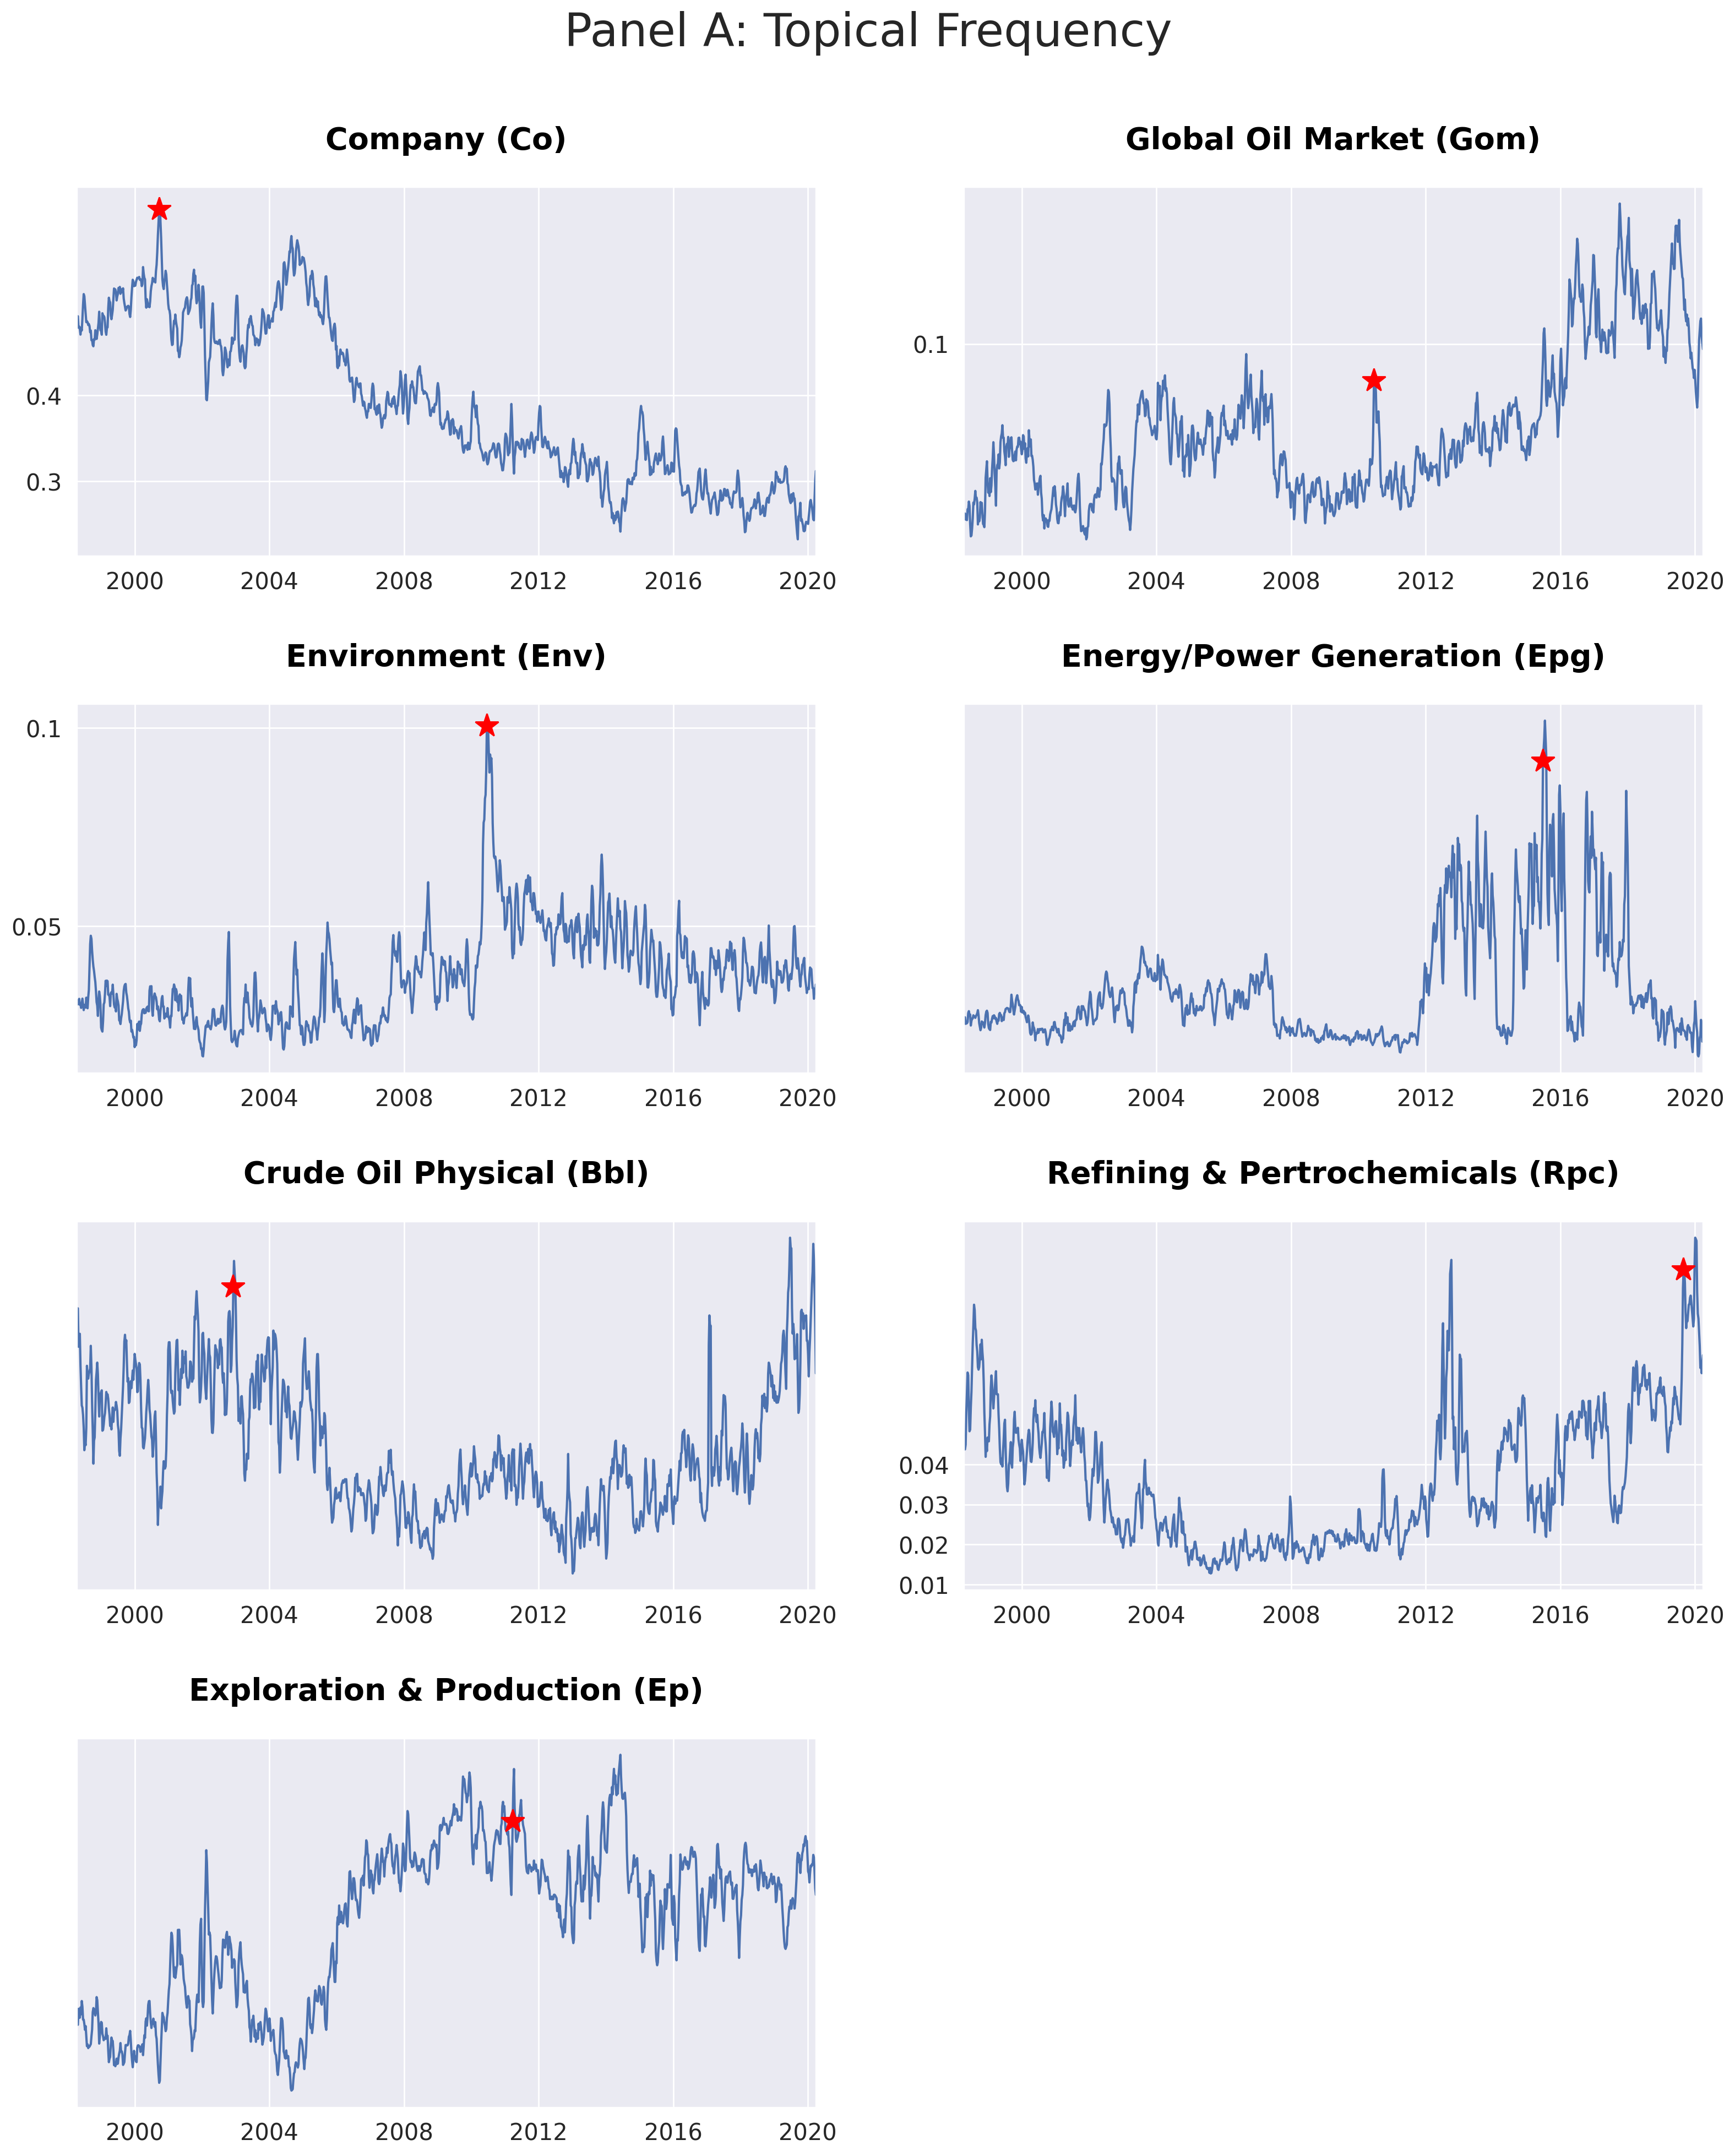

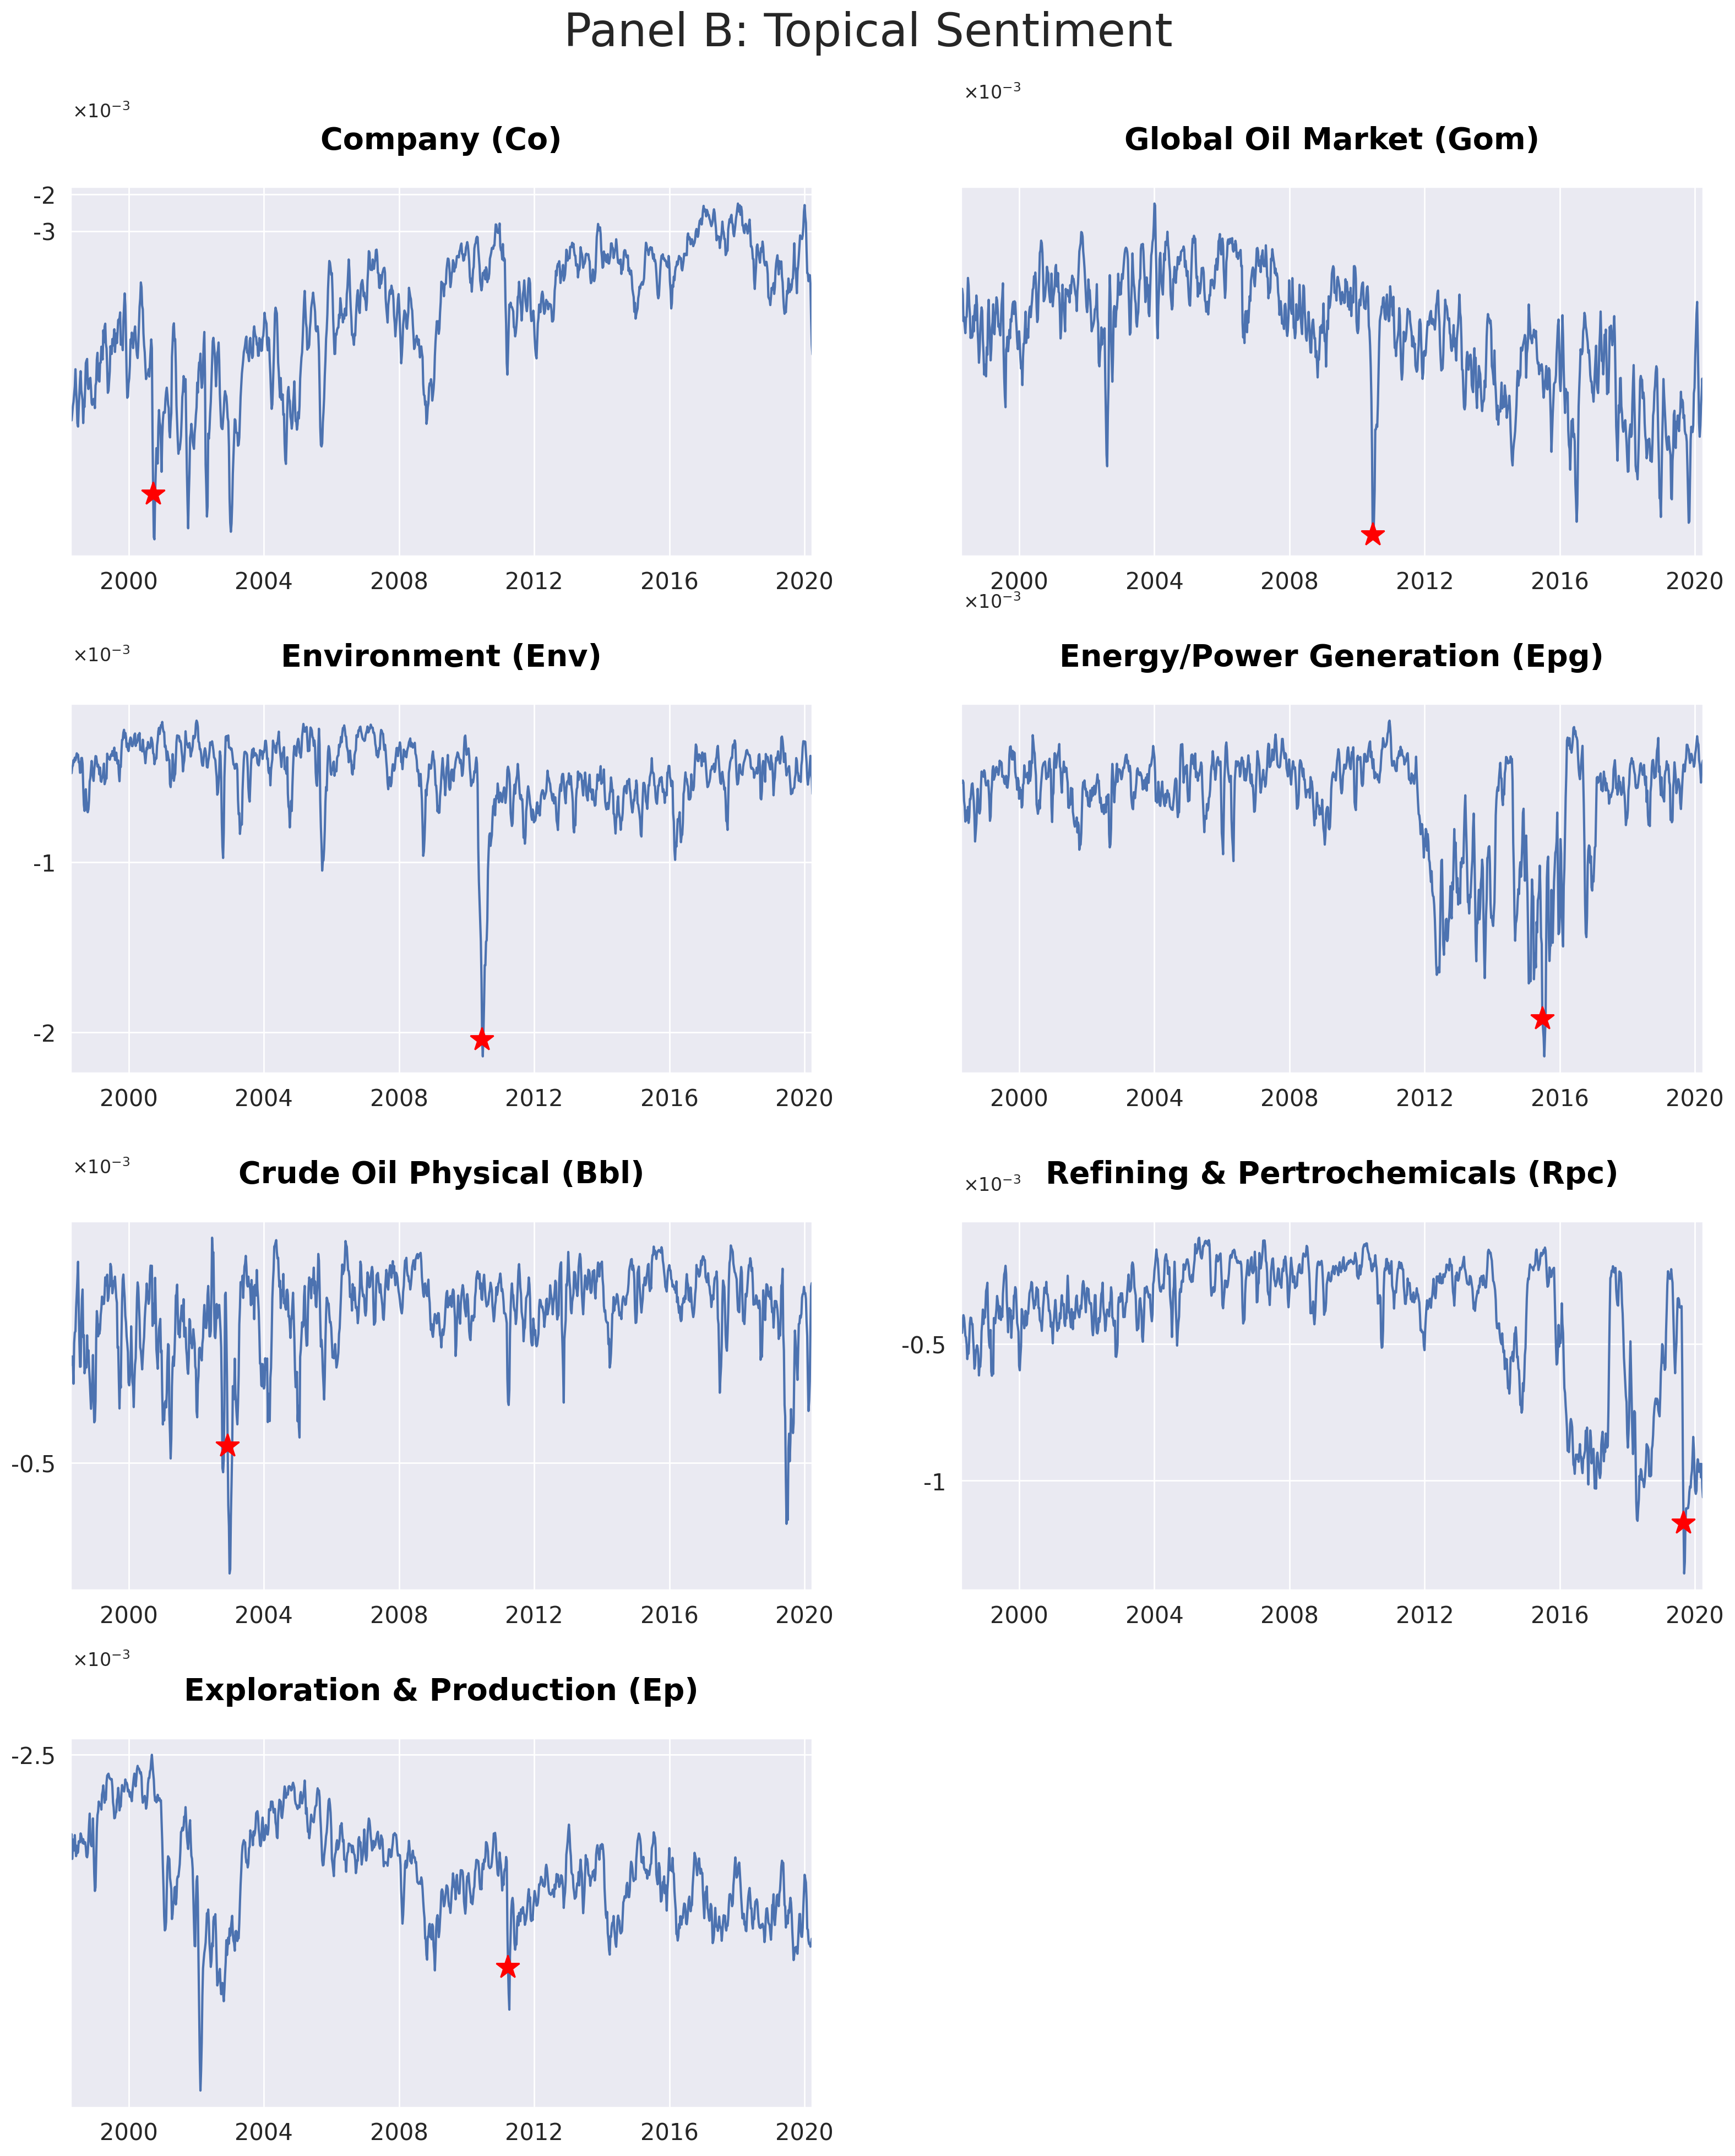

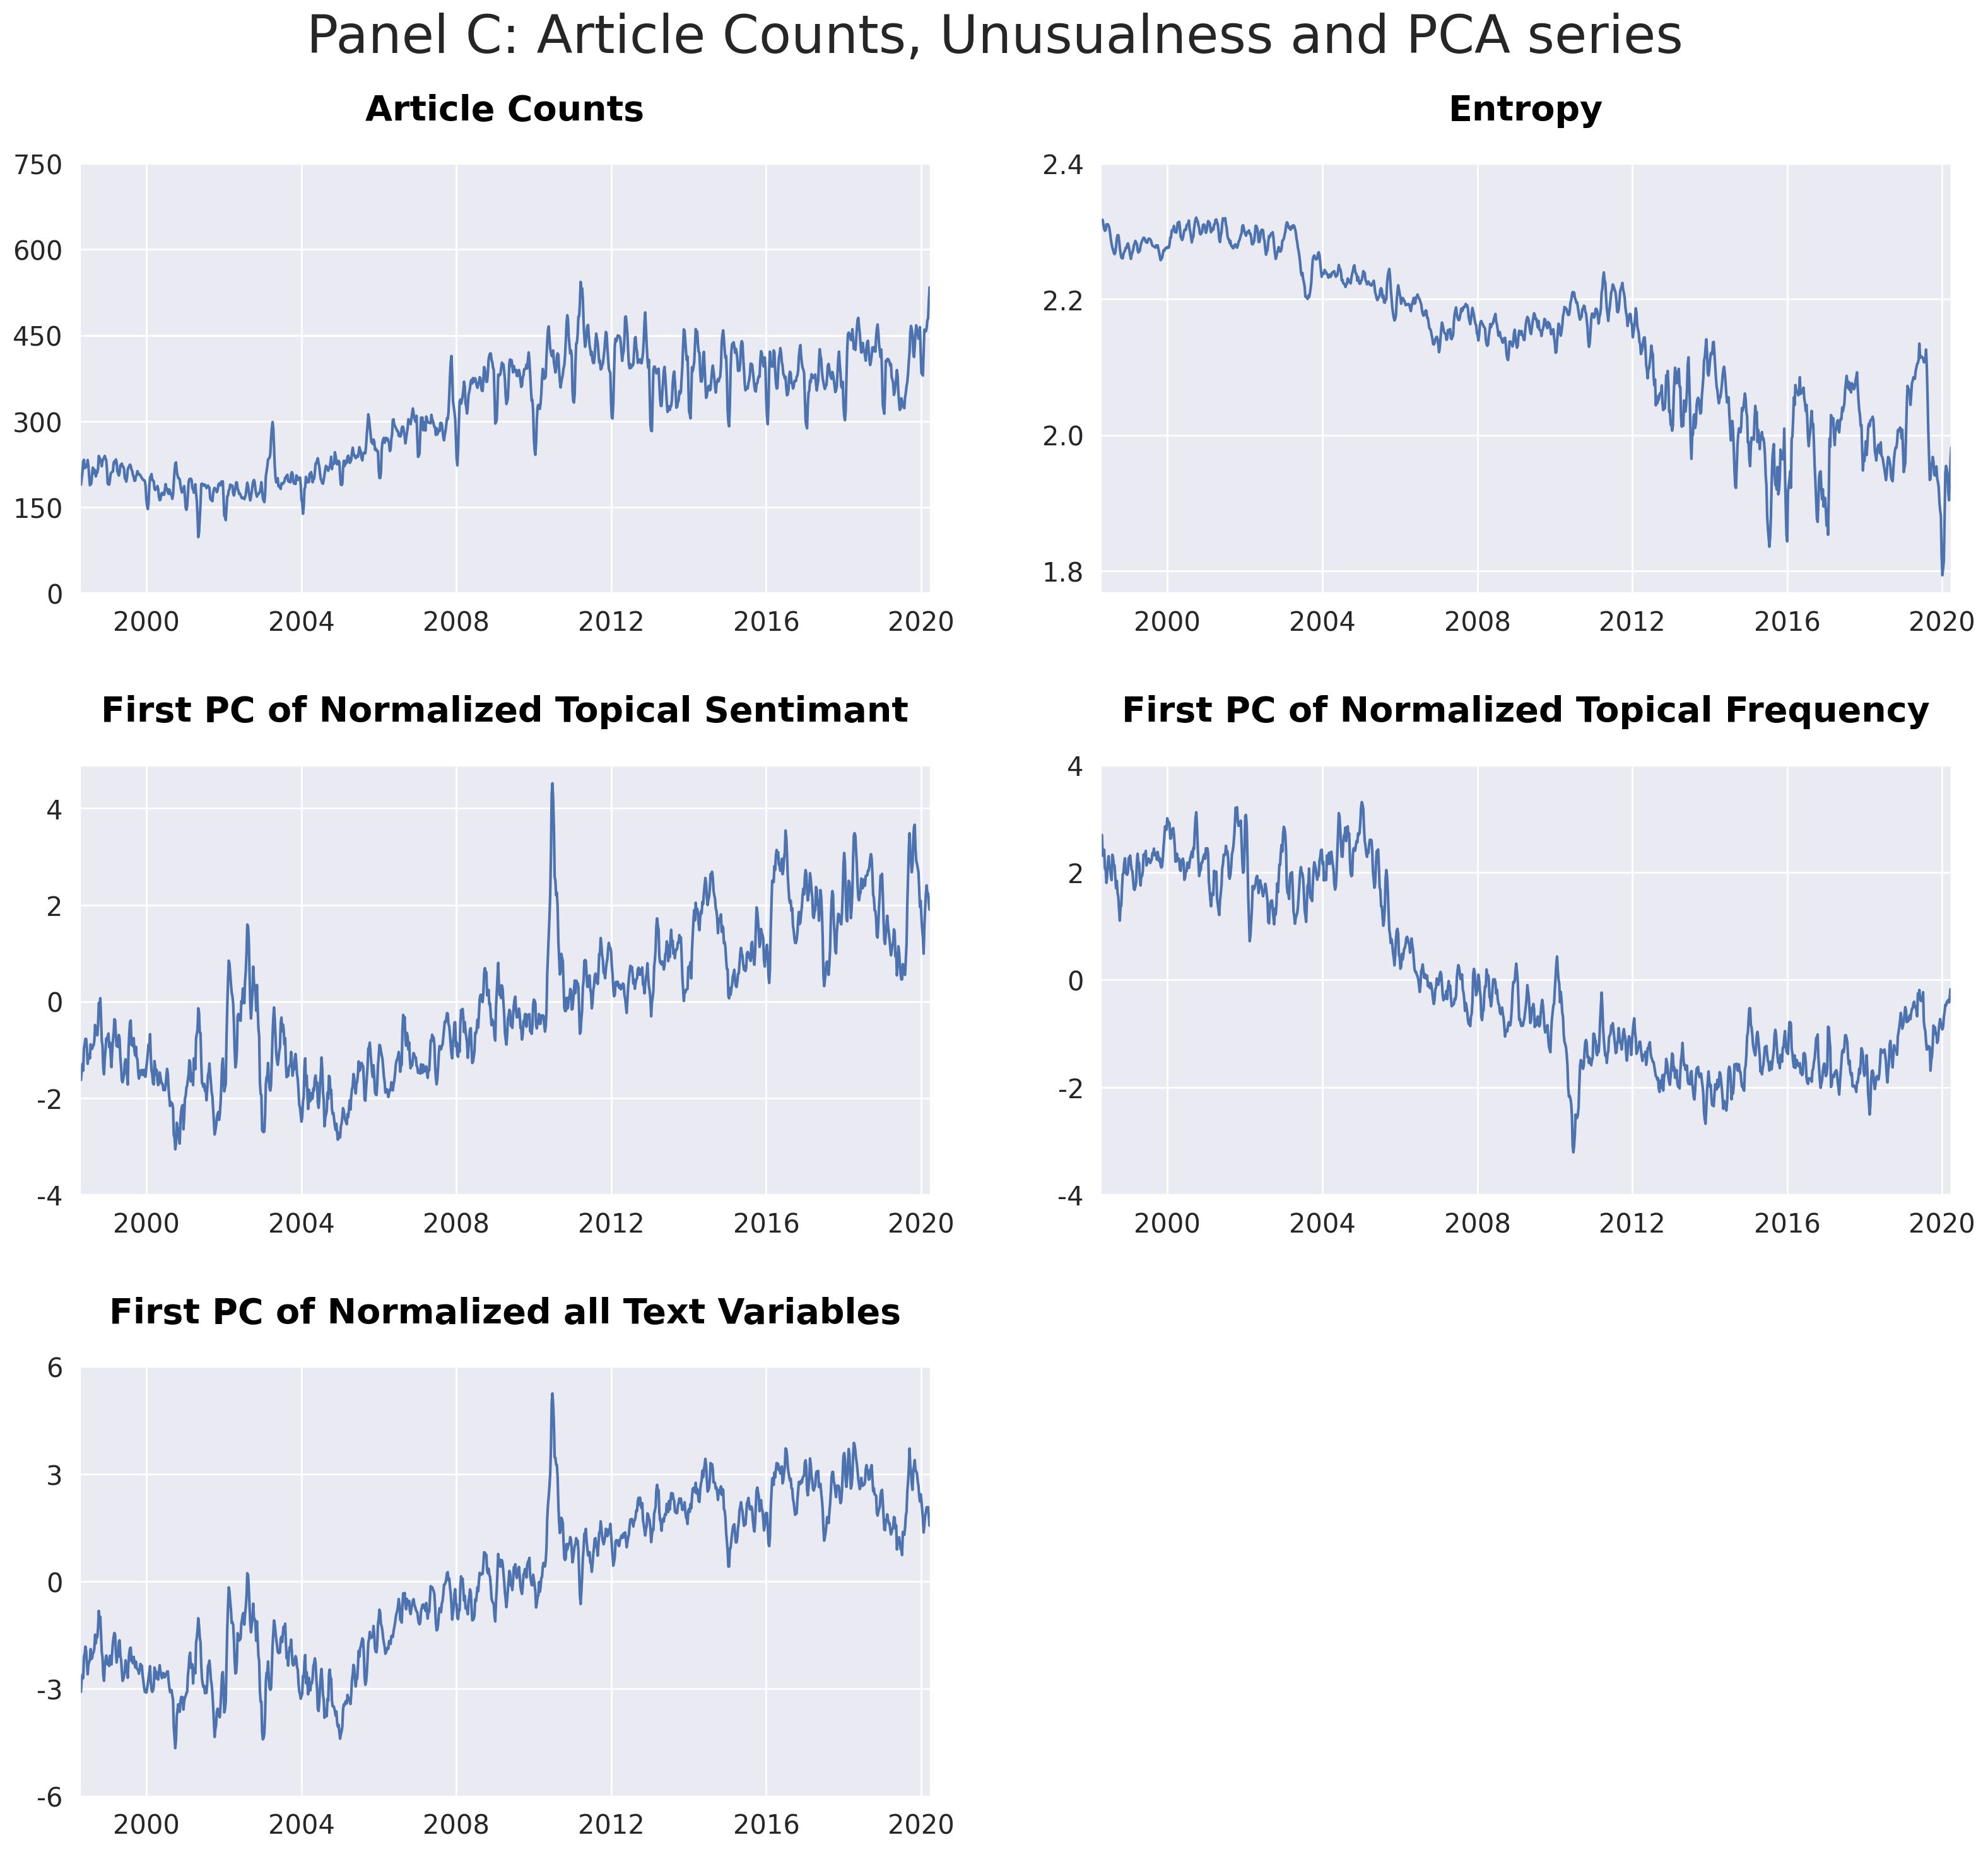

In [33]:
event_dates = {'1':('2000-09-20','UK fuel protests'),
               '2':('2010-06-16','BP oil spill aftermath on global market'),
               '3':('2010-06-16','BP oil spill aftermath on environment'),
               '4':('2015-06-24','Bulgarian power price protest'),
               '5':('2002-12-04','Colin Powell visiting Colombia'),
               '6':('2019-08-28','Government assault in Yemen'),
               '7':('2011-03-23','Fukushima nuclear disaster'),        
}

# read the latest dataset
dataset = pd.read_stata('transformed_data_prices_v19.2_mod.dta')
date_cols_price = [x for x in list(dataset.columns.values) if 'date' in x]
dataset = dataset.rename(columns={x:'_'.join(x.split('_')[:-1]) for x in set(dataset.columns.values) if x not in date_cols_price})

# remedy missing var in in-sample analysis
dataset = dataset.rename(columns={'date_Fri':'date'})
# remedy missing var in in-sample analysis
dataset['sent'] = dataset['sCo']+dataset['sGom']+dataset['sEnv']\
                 +dataset['sEpg']+dataset['sBbl']+dataset['sRpc']+dataset['sEp']

plot_freq(dataset)
plot_sent(dataset)
plot_others(dataset)